# Inicializar

In [1]:
from Modelos.base_model import base_model
from Modelos.serie_model import serie_model
from Modelos.parallel_model import parallel_model
from Modelos.hibrid_model import hibrid_model
from utils.utils import mostrarResultadosTabla, generate_equidistant_list, graficar_costos_minimizados

In [2]:
totalNodes = 10
linkCost = 10
costByNodeType = {0: 5, 1: 12, 2: 20}
reliabilityByNodeType = {0: 0.5, 1: 0.6, 2: 0.7}
baseModel = base_model(totalNodes, costByNodeType)

Restricted license - for non-production use only - expires 2026-11-23


# Pruebas

## Serie

In [3]:
# Obtener la confiabilidad mínima y máxima obtenibles
# Hacer una lista de confiabilidades equidistantes entre la mínima y máxima
seriesMinReliability = reliabilityByNodeType[0] ** totalNodes
seriesMaxReliability = reliabilityByNodeType[2] ** totalNodes
requiredReliabilities = generate_equidistant_list(seriesMinReliability, seriesMaxReliability, 10)
print(seriesMinReliability, seriesMaxReliability)
print(requiredReliabilities)

0.0009765625 0.02824752489999998
[0.00345574, 0.00593492, 0.0084141, 0.01089328, 0.01337245, 0.01585163, 0.01833081, 0.02080999, 0.02328917, 0.02576835]


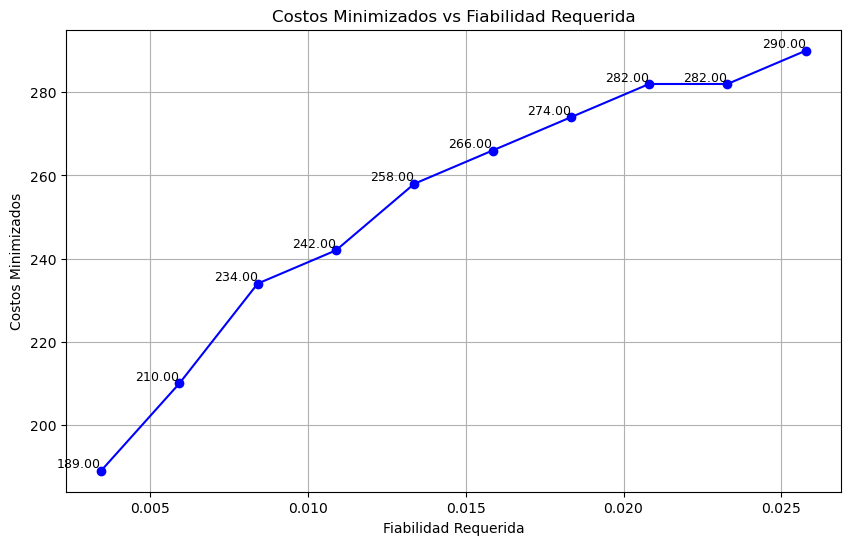

In [ ]:
# Crear y optimizar el modelo en serie
try:
    serieMinimizedCosts = []
    for reqReliability in requiredReliabilities:
        minCost, seriesVars, seriesModel = serie_model(baseModel, totalNodes, linkCost, reliabilityByNodeType, reqReliability)
        serieMinimizedCosts.append(minCost)
    graficar_costos_minimizados(requiredReliabilities, serieMinimizedCosts)
except ValueError as e:
    print(f"Error: {e}")

In [5]:
try:
    seriesMinCost, seriesVars, seriesModel = serie_model(baseModel, totalNodes, linkCost, reliabilityByNodeType, requiredReliabilities[5])
    mostrarResultadosTabla(totalNodes, seriesMinCost, seriesVars)
except Exception as e:
    print(f"Error: {e}")

Cantidad de Nodos: 10
Resultado de la Optimización:
Costo Total: 266.0
Costo nodos: 176.0
Costo enlaces: 90.0
Nodos activos (x):
    Low Cost  Mid Cost  High Cost
1          0         0          1
2          0         0          1
3          0         0          1
4          0         1          0
5          0         0          1
6          0         1          0
7          0         1          0
8          0         0          1
9          0         0          1
10         0         0          1


## Paralelo

In [6]:
# Crear y optimizar el modelo en paralelo
try:
    parallelMinCost, parallelVars, parallelModel = parallel_model(baseModel, totalNodes, linkCost)
    mostrarResultadosTabla(totalNodes, parallelMinCost, parallelVars)
except Exception as e:
    print(f"Error: {e}")

Cantidad de Nodos: 10
Resultado de la Optimización:
Costo Total: 500.0
Costo nodos: 50.0
Costo enlaces: 450.0
Nodos activos (x):
    Low Cost  Mid Cost  High Cost
1          1         0          0
2          1         0          0
3          1         0          0
4          1         0          0
5          1         0          0
6          1         0          0
7          1         0          0
8          1         0          0
9          1         0          0
10         1         0          0


## Hibrido

In [7]:
# Crear y optimizar el modelo híbrido
try:
    hybridMinCost, hybridVars, hybridModel = hibrid_model(baseModel, totalNodes, linkCost)
    mostrarResultadosTabla(totalNodes, hybridMinCost, hybridVars, "hibrido")
except Exception as e:
    print(f"Error: {e}")

Cantidad de Nodos: 10
Resultado de la Optimización:
Costo Total: 150.0
Costo nodos: 50.0
Costo enlaces: 100.0
Nodos activos (x):
    Low Cost  Mid Cost  High Cost
1          1         0          0
2          1         0          0
3          1         0          0
4          1         0          0
5          1         0          0
6          1         0          0
7          1         0          0
8          1         0          0
9          1         0          0
10         1         0          0
Nodos activos (y):
    Subred 0  Subred 1  Subred 2  Subred 3
1          0         0         1         0
2          0         0         1         0
3          1         0         0         0
4          1         0         0         0
5          0         0         1         0
6          1         0         0         0
7          1         0         0         0
8          1         0         0         0
9          1         0         0         0
10         1         0         0         0
